In [88]:
import tensorflow as tf # Tensorflow is a neural network and deep neural network library
from tensorflow import keras # Keras is a high-level wrapper that makes working with tensorflow easier
from tensorflow.keras import layers # Layers contains different types of layers such as Dense, Convolutional, Recurrent

import numpy as np
import pandas as pd

In [89]:
# load dataset
df = pd.read_csv("new_dataset_0.csv")
df

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,Lyrics
0,Clouds Of Dementia,Candlemass,spotify:track:6cHZf7RbxXCKwEkgAZT4mY,0.162,0.836,9,-3.009,1,0.0473,0.000111,0.004570,0.1740,0.300,86.964,338893,4,65.32887,13,0,Jaded and demented\nIn the attic the bonemen s...
1,I Got A Feelin',Billy Currington,spotify:track:1tF370eYXUcWwkIvaq3IGz,0.630,0.764,2,-4.353,1,0.0275,0.363000,0.000000,0.1250,0.631,112.098,193760,4,22.62384,10,1,I don't wanna rush this thing\nI don't wanna j...
2,Nothin' To Die For,Tim McGraw,spotify:track:3lRSz6HujrSy9b3LXg2Kq9,0.481,0.786,10,-5.654,1,0.0288,0.053800,0.000000,0.0759,0.389,153.105,253640,4,19.65701,11,1,Stopped to have a few at five\nNow you're cros...
3,I Want to Know Your Plans,Say Anything,spotify:track:3pjnCLIHbRczUjenWOEo56,0.647,0.324,7,-9.679,1,0.0377,0.354000,0.000000,0.1150,0.344,124.213,314286,3,32.66343,16,0,I want to know your plans\nAnd how involved in...
4,Amarillo Sky,Jason Aldean,spotify:track:0axUHkhMMY0YSC1jFBVWqv,0.491,0.776,2,-3.887,1,0.0393,0.314000,0.000000,0.1460,0.428,154.988,202547,4,37.86861,9,1,He gets up before the dawn\nPacks a lunch and ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2116,Zombified Infanticide,Kraanium,spotify:track:4IkE5nXab9Qs6iidv2BODI,0.190,0.912,11,-6.140,0,0.1350,0.002420,0.874000,0.0919,0.328,83.964,170083,4,121.93288,5,0,Raped by a pack of undead\nLeft mutilated but ...
2117,Rise Above This,Seether,spotify:track:4dZ4iHhsqQAQ4em4abLB6C,0.533,0.830,1,-3.092,1,0.0324,0.011000,0.000003,0.0801,0.249,120.028,203893,4,36.66597,13,1,Take the light\nAnd darken everything around m...
2118,Come Back To Me,Vanessa Hudgens,spotify:track:0occ3Gxp6ZV5DUmJNuEsQB,0.650,0.868,5,-3.988,1,0.0840,0.000836,0.000016,0.2450,0.710,87.961,166867,4,40.71240,6,1,Haha\nYa'll need to get ready to hear\nThe unb...
2119,You're The Only One,Maria Mena,spotify:track:5GdUQQ8WYOSwpgMad7k7Gy,0.687,0.584,9,-6.493,1,0.0326,0.023100,0.000000,0.1460,0.524,123.956,165000,4,23.08641,10,1,Well I saw you with your hands above your head...


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
danceability,1.000000,-0.230977,0.008860,-0.009599,-0.049173,0.059766,0.127124,-0.312852,-0.147434,0.582089,-0.235720,-0.113641,0.181163,-0.085231,-0.074534,0.449296
energy,-0.230977,1.000000,-0.027247,0.664726,-0.078896,0.147665,-0.648704,0.090946,0.226244,0.135335,0.141981,-0.085255,0.020079,0.010191,-0.105525,-0.223655
key,0.008860,-0.027247,1.000000,-0.035536,-0.111611,0.016047,-0.001170,-0.024790,-0.029260,0.011157,-0.015125,0.020297,0.044244,-0.017874,0.019799,-0.009527
loudness,-0.009599,0.664726,-0.035536,1.000000,-0.008105,0.037173,-0.499253,-0.190163,0.098003,0.152184,0.079825,-0.100985,0.053846,-0.018886,-0.081602,0.132986
mode,-0.049173,-0.078896,-0.111611,-0.008105,1.000000,-0.100081,0.072419,-0.067808,-0.008646,-0.042814,0.018006,-0.044286,-0.015755,-0.049740,-0.020501,0.131335
speechiness,0.059766,0.147665,0.016047,0.037173,-0.100081,1.000000,-0.055046,-0.014803,0.151387,0.076275,0.028830,-0.035990,0.008891,0.015255,-0.027715,-0.086559
acousticness,0.127124,-0.648704,-0.001170,-0.499253,0.072419,-0.055046,1.000000,-0.045230,-0.133505,-0.037426,-0.082163,-0.002484,-0.004593,-0.007094,0.019723,0.096728
instrumentalness,-0.312852,0.090946,-0.024790,-0.190163,-0.067808,-0.014803,-0.045230,1.000000,0.032191,-0.260079,-0.022099,0.168722,-0.123509,0.090410,0.099045,-0.432403
liveness,-0.147434,0.226244,-0.029260,0.098003,-0.008646,0.151387,-0.133505,0.032191,1.000000,-0.048915,0.053110,0.010660,-0.002607,0.041798,0.003293,-0.148856
valence,0.582089,0.135335,0.011157,0.152184,-0.042814,0.076275,-0.037426,-0.260079,-0.048915,1.000000,-0.024316,-0.174799,0.173121,-0.086270,-0.124070,0.264133


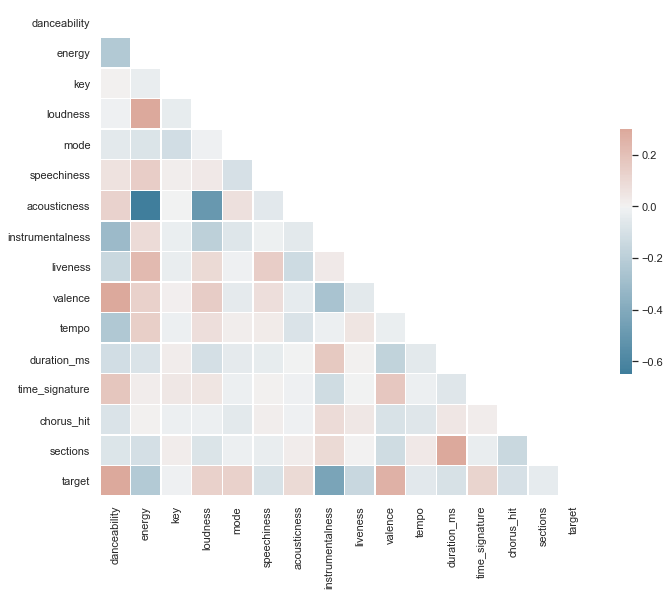

In [90]:
#  data visualisation

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

corr

In [91]:
# track	,artist	,uri,	danceability,	energy,	key,	loudness,	mode,	speechiness,	acousticness,	instrumentalness,	liveness,	valence,	tempo,	duration_ms,	time_signature,	chorus_hit,	sections,	target,	Lyrics
# according to the map:
# energy, speechiness instrumentalness, liveness, chorus_hit, danceability, loudness, mode, acousticness, valence, time_signature, 
df = df.drop(["track", "artist", "uri", "key", "tempo","duration_ms", "sections", "Lyrics"], axis=1)

In [92]:
# df["Length (Duration)"] = df["Length (Duration)"].str.replace(r',', '')


In [93]:
# print(df.shape)
# change popularity score from continuous data to binary data
# df["Popularity Score"] = np.where(df["Popularity Score"] <= 63, 0, 1)


In [94]:
df

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,time_signature,chorus_hit,target
0,0.162,0.836,-3.009,1,0.0473,0.000111,0.004570,0.1740,0.300,4,65.32887,0
1,0.630,0.764,-4.353,1,0.0275,0.363000,0.000000,0.1250,0.631,4,22.62384,1
2,0.481,0.786,-5.654,1,0.0288,0.053800,0.000000,0.0759,0.389,4,19.65701,1
3,0.647,0.324,-9.679,1,0.0377,0.354000,0.000000,0.1150,0.344,3,32.66343,0
4,0.491,0.776,-3.887,1,0.0393,0.314000,0.000000,0.1460,0.428,4,37.86861,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2116,0.190,0.912,-6.140,0,0.1350,0.002420,0.874000,0.0919,0.328,4,121.93288,0
2117,0.533,0.830,-3.092,1,0.0324,0.011000,0.000003,0.0801,0.249,4,36.66597,1
2118,0.650,0.868,-3.988,1,0.0840,0.000836,0.000016,0.2450,0.710,4,40.71240,1
2119,0.687,0.584,-6.493,1,0.0326,0.023100,0.000000,0.1460,0.524,4,23.08641,1


In [95]:
y = df["target"]
x = df.drop(["target"],axis=1)
print(x)

      danceability  energy  loudness  mode  speechiness  acousticness  \
0            0.162   0.836    -3.009     1       0.0473      0.000111   
1            0.630   0.764    -4.353     1       0.0275      0.363000   
2            0.481   0.786    -5.654     1       0.0288      0.053800   
3            0.647   0.324    -9.679     1       0.0377      0.354000   
4            0.491   0.776    -3.887     1       0.0393      0.314000   
...            ...     ...       ...   ...          ...           ...   
2116         0.190   0.912    -6.140     0       0.1350      0.002420   
2117         0.533   0.830    -3.092     1       0.0324      0.011000   
2118         0.650   0.868    -3.988     1       0.0840      0.000836   
2119         0.687   0.584    -6.493     1       0.0326      0.023100   
2120         0.765   0.791    -5.707     1       0.0317      0.262000   

      instrumentalness  liveness  valence  time_signature  chorus_hit  
0             0.004570    0.1740    0.300          

In [96]:
"""
Neural Network Model
"""

'\nNeural Network Model\n'

In [104]:
def make_model(input_shape, num_classes): 
    inputs = keras.Input(shape=input_shape)
    # print(inputs)
    # standardize
    #  what if i dont flatten?
    x = inputs
    # x = layers.Rescaling(1.0 / 100)(inputs)
    # x = layers.Flatten()(x)
    # Part 1 left optimise and Part 2 done
    # hidden layers relu and sigmoid
    x = layers.Dense(8, activation="relu")(x)
    # x = layers.Dense(4, activation="sigmoid")(x)
    x = layers.Dense(2, activation="sigmoid")(x)
    # Write dense layers with non-linear activation here.
    activation = "softmax"
    units = num_classes # num_class would be different for MNIST.
    outputs = layers.Dense(units, activation=activation)(x)
    return keras.Model(inputs, outputs)

image_size = (11)
model = make_model(input_shape=image_size, num_classes=1)
keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [105]:
import numpy as np
from sklearn.model_selection import train_test_split

# Part 3
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.3, random_state=42)

print(len(x_train))
print(len(x_val))
print(len(x_test))

1038
637
446


In [106]:
epochs = 2

callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.keras"),
    keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=2, # You can change it
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)
]
model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="categorical_crossentropy", # You would need to change here for MNIST; use categorical crossentropy
    metrics=["accuracy"],
)
x_train = np.asarray(x_train).astype(np.int)
y_train = np.asarray(y_train).astype(np.int)
x_test = np.asarray(x_test).astype(np.int)
x_test = np.asarray(x_test).astype(np.int)
y_test = np.asarray(y_test).astype(np.int)
x_val = np.asarray(x_val).astype(np.int)
y_val = np.asarray(y_val).astype(np.int)

model.fit(
    x=x_train,
    y=y_train,
    epochs=epochs,
    batch_size=8,
    callbacks=callbacks,
    validation_data=(x_val,y_val),
)
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

Epoch 1/2


<ipython-input-106-a503b1678184>:21: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x_train = np.asarray(x_train).astype(np.int)
<ipython-input-106-a503b1678184>:22: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in Num

130/130 [==============================] - 1s 4ms/step - loss: 0.0000e+00 - accuracy: 0.6146 - val_loss: 0.0000e+00 - val_accuracy: 0.6421
Epoch 2/2
14/14 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.6188
Test accuracy: 0.6188340783119202


In [100]:
from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K

In [101]:
def get_f1(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [102]:
"""
Regressions
"""

'\nRegressions\n'

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
# create a LinearRegression object
model = LinearRegression()

# fit the model using your training data
model.fit(x_train, y_train)

# make predictions using your test data
y_pred = model.predict(x_test)

print(accuracy_score(y_test,y_pred))
# print(y_pred)
# print(y_test)
# count = 0
# for i in range(len(y_pred)):
#     if y_pred[i] <0.63:
#         y_pred[i]=0
#     else:
#         y_pred[i]=1

#     if y_pred[i] == y_test[i]:
#         count +=1
# print(count/len(y_test))


ValueError: Classification metrics can't handle a mix of binary and continuous targets

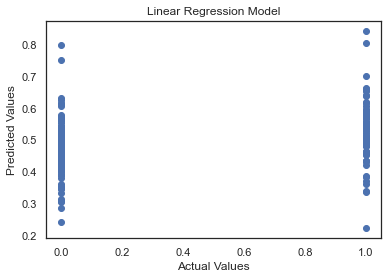

In [ ]:
import matplotlib.pyplot as plt

# plot the actual values vs predicted values
plt.scatter(y_test, y_pred)

# add a label for the x-axis
plt.xlabel('Actual Values')

# add a label for the y-axis
plt.ylabel('Predicted Values')

# add a title to the plot
plt.title('Linear Regression Model')

# show the plot
plt.show()


In [ ]:
import numpy as np
def sigmoid(z):
    return 1.0/(1 + np.exp(-z))

def loss(y, y_hat):
    loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
    return loss

def gradients(X, y, y_hat):
    
    # X --> Input.
    # y --> true/target value.
    # y_hat --> hypothesis/predictions.
    # w --> weights (parameter).
    # b --> bias (parameter).
    
    # m-> number of training examples.
    m = X.shape[0]
    
    # Gradient of loss w.r.t weights.
    dw = (1/m)*np.dot(X.T, (y_hat - y))
    
    # Gradient of loss w.r.t bias.
    db = (1/m)*np.sum((y_hat - y)) 
    
    return dw, db


def plot_decision_boundary(X, w, b):
    
    # X --> Inputs
    # w --> weights
    # b --> bias
    
    # The Line is y=mx+c
    # So, Equate mx+c = w.X + b
    # Solving we find m and c
    x1 = [min(X[:,0]), max(X[:,0])]
    m = -w[0]/w[1]
    c = -b/w[1]
    x2 = m*x1 + c
    
    # Plotting
    fig = plt.figure(figsize=(10,8))
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "g^")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
    plt.xlim([-2, 2])
    plt.ylim([0, 2.2])
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title('Decision Boundary')
    plt.plot(x1, x2, 'y-')


def normalize(X):
    
    # X --> Input.
    
    # m-> number of training examples
    # n-> number of features 
    m, n = X.shape
    
    # Normalizing all the n features of X.
    for i in range(n):
        X = (X - X.mean(axis=0))/X.std(axis=0)
        
    return X


def train(X, y, bs, epochs, lr):
    
    # X --> Input.
    # y --> true/target value.
    # bs --> Batch Size.
    # epochs --> Number of iterations.
    # lr --> Learning rate.
        
    # m-> number of training examples
    # n-> number of features 
    m, n = X.shape
    
    # Initializing weights and bias to zeros.
    w = np.zeros((n,1))
    b = 0
    
    # Reshaping y.
    y = y.reshape(m,1)
    
    # Normalizing the inputs.
    x = normalize(X)
    
    # Empty list to store losses.
    losses = []
    
    # Training loop.
    for epoch in range(epochs):
        for i in range((m-1)//bs + 1):
            
            # Defining batches. SGD.
            start_i = i*bs
            end_i = start_i + bs
            xb = X[start_i:end_i]
            yb = y[start_i:end_i]
            
            # Calculating hypothesis/prediction.
            y_hat = sigmoid(np.dot(xb, w) + b)
            
            # Getting the gradients of loss w.r.t parameters.
            dw, db = gradients(xb, yb, y_hat)
            
            # Updating the parameters.
            w -= lr*dw
            b -= lr*db
        
        # Calculating loss and appending it in the list.
        l = loss(y, sigmoid(np.dot(X, w) + b))
        losses.append(l)
        
    # returning weights, bias and losses(List).
    return w, b, losses


def predict(X):
    
    # X --> Input.
    
    # Normalizing the inputs.
    x = normalize(X)
    
    # Calculating presictions/y_hat.
    preds = sigmoid(np.dot(X, w) + b)
    
    # Empty List to store predictions.
    pred_class = []
    # if y_hat >= 0.5 --> round up to 1
    # if y_hat < 0.5 --> round up to 1
    pred_class = [1 if i > 0.5 else 0 for i in preds]
    
    return np.array(pred_class)


In [ ]:
# Training 
w, b, l = train(X, y, bs=100, epochs=1000, lr=0.01)
# Plotting Decision Boundary
plot_decision_boundary(X, w, b)

In [ ]:
def accuracy(y, y_hat):
    accuracy = np.sum(y == y_hat) / len(y)
    return accuracy
accuracy(X, y_hat=predict(X))